In [176]:
import tensorflow.keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
seed = 569874
rng = np.random.RandomState(seed)
import matplotlib.pyplot as pylab
%matplotlib inline

In [2]:
train = pd.read_csv(os.path.join('', 'train.csv'))
test = pd.read_csv(os.path.join('', 'test.csv'))
sample= pd.read_csv(os.path.join('', 'Sample.csv'))
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
train.head()

,image,category,Cargo,Military,Carrier,Cruise,Tankers
0,2823080.jpg,1,1,0,0,0,0
1,2870024.jpg,1,1,0,0,0,0
2,2662125.jpg,2,0,1,0,0,0
3,2900420.jpg,3,0,0,1,0,0
4,2804883.jpg,2,0,1,0,0,0


In [5]:
train['Cargo']=train.apply(lambda row: 1 if row.category == 1 else 0 , axis=1)
train['Military']=train.apply(lambda row: 1 if row.category == 2 else 0 , axis=1)
train['Carrier']=train.apply(lambda row: 1 if row.category == 3 else 0 , axis=1)
train['Cruise']=train.apply(lambda row: 1 if row.category == 4 else 0 , axis=1)
train['Tankers']=train.apply(lambda row: 1 if row.category == 5 else 0 , axis=1)

In [7]:
test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [8]:
sample.head()

,image,category
0,1007700.jpg,1
1,1011369.jpg,1
2,1051155.jpg,1
3,1062001.jpg,1
4,1069397.jpg,1


In [10]:
train.columns

Index(['image', 'category', 'Cargo', 'Military', 'Carrier', 'Cruise',
       'Tankers'],
      dtype='object')

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


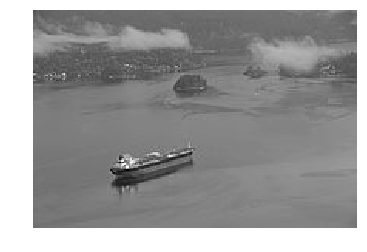

In [9]:
import matplotlib.pyplot as pylab
img_name = rng.choice(train.image)
filepath = os.path.join('train', 'images', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [11]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/images/'+train['image'][i],target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 6252/6252 [02:39<00:00, 39.13it/s]


In [12]:
X .shape

(6252, 128, 128, 3)

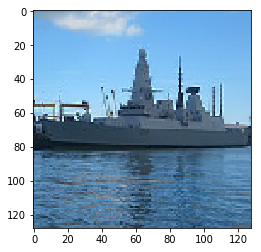

In [13]:
plt.imshow(X[4])

In [14]:
y = np.array(train.drop(['image', 'category'],axis=1))
y.shape

(6252, 5)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [177]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 25, 25, 64)      

In [178]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_, batch_size=15,verbose=2)

In [125]:
model.save('basic_epoch_60_75%_accurate.h5')

In [127]:
# Importing the required Keras modules containing model and layers

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D , GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras import losses
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (4,4),padding='same', activation='relu', input_shape=(128, 128,3)) , 
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.20),
    
      tf.keras.layers.Flatten(),
    
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
    
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
    
    
      tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



print(model.summary())
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=15,verbose=1)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16777344  
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 128)             

2790/5001 [===============>..............] - ETA: 21:02 - loss: 0.8181 - accuracy: 0.733 - ETA: 13:41 - loss: 0.7570 - accuracy: 0.733 - ETA: 11:08 - loss: 0.7261 - accuracy: 0.751 - ETA: 9:53 - loss: 0.7764 - accuracy: 0.736 - ETA: 9:10 - loss: 0.7628 - accuracy: 0.73 - ETA: 8:37 - loss: 0.7818 - accuracy: 0.73 - ETA: 8:14 - loss: 0.7604 - accuracy: 0.73 - ETA: 7:56 - loss: 0.7466 - accuracy: 0.73 - ETA: 7:43 - loss: 0.7360 - accuracy: 0.73 - ETA: 7:34 - loss: 0.7235 - accuracy: 0.74 - ETA: 7:25 - loss: 0.7066 - accuracy: 0.74 - ETA: 7:16 - loss: 0.7175 - accuracy: 0.73 - ETA: 7:09 - loss: 0.7195 - accuracy: 0.73 - ETA: 7:02 - loss: 0.7110 - accuracy: 0.73 - ETA: 6:59 - loss: 0.7003 - accuracy: 0.74 - ETA: 6:54 - loss: 0.6909 - accuracy: 0.74 - ETA: 6:50 - loss: 0.6753 - accuracy: 0.75 - ETA: 6:45 - loss: 0.6664 - accuracy: 0.75 - ETA: 6:40 - loss: 0.6547 - accuracy: 0.75 - ETA: 6:37 - loss: 0.6476 - accuracy: 0.76 - ETA: 6:32 - loss: 0.6466 - accuracy: 0.76 - ETA: 6:30 - loss: 0.6414

5001/5001 [==============================] - ETA: 3:06 - loss: 0.5293 - accuracy: 0.77 - ETA: 3:05 - loss: 0.5294 - accuracy: 0.77 - ETA: 3:03 - loss: 0.5292 - accuracy: 0.77 - ETA: 3:02 - loss: 0.5293 - accuracy: 0.77 - ETA: 3:00 - loss: 0.5289 - accuracy: 0.77 - ETA: 2:59 - loss: 0.5286 - accuracy: 0.77 - ETA: 2:58 - loss: 0.5291 - accuracy: 0.77 - ETA: 2:56 - loss: 0.5286 - accuracy: 0.77 - ETA: 2:55 - loss: 0.5283 - accuracy: 0.77 - ETA: 2:53 - loss: 0.5280 - accuracy: 0.77 - ETA: 2:52 - loss: 0.5281 - accuracy: 0.77 - ETA: 2:51 - loss: 0.5276 - accuracy: 0.77 - ETA: 2:49 - loss: 0.5272 - accuracy: 0.77 - ETA: 2:48 - loss: 0.5266 - accuracy: 0.77 - ETA: 2:47 - loss: 0.5266 - accuracy: 0.77 - ETA: 2:45 - loss: 0.5260 - accuracy: 0.77 - ETA: 2:44 - loss: 0.5265 - accuracy: 0.77 - ETA: 2:43 - loss: 0.5269 - accuracy: 0.77 - ETA: 2:42 - loss: 0.5269 - accuracy: 0.77 - ETA: 2:41 - loss: 0.5268 - accuracy: 0.77 - ETA: 2:40 - loss: 0.5260 - accuracy: 0.77 - ETA: 2:39 - loss: 0.5260 - accu

2790/5001 [===============>..............] - ETA: 6:43 - loss: 0.4799 - accuracy: 0.82 - ETA: 6:59 - loss: 0.4955 - accuracy: 0.78 - ETA: 6:59 - loss: 0.4833 - accuracy: 0.79 - ETA: 6:48 - loss: 0.4632 - accuracy: 0.80 - ETA: 6:51 - loss: 0.4535 - accuracy: 0.79 - ETA: 6:54 - loss: 0.4574 - accuracy: 0.79 - ETA: 6:56 - loss: 0.4421 - accuracy: 0.80 - ETA: 7:02 - loss: 0.4315 - accuracy: 0.80 - ETA: 7:02 - loss: 0.4282 - accuracy: 0.80 - ETA: 7:00 - loss: 0.4188 - accuracy: 0.81 - ETA: 7:00 - loss: 0.4142 - accuracy: 0.81 - ETA: 6:58 - loss: 0.4094 - accuracy: 0.82 - ETA: 6:57 - loss: 0.4037 - accuracy: 0.82 - ETA: 6:58 - loss: 0.4046 - accuracy: 0.82 - ETA: 6:57 - loss: 0.4144 - accuracy: 0.82 - ETA: 6:57 - loss: 0.4201 - accuracy: 0.81 - ETA: 6:55 - loss: 0.4150 - accuracy: 0.81 - ETA: 6:50 - loss: 0.4100 - accuracy: 0.81 - ETA: 6:53 - loss: 0.4089 - accuracy: 0.81 - ETA: 6:53 - loss: 0.4064 - accuracy: 0.81 - ETA: 6:54 - loss: 0.4064 - accuracy: 0.81 - ETA: 6:53 - loss: 0.4061 - accu

5001/5001 [==============================] - ETA: 2:43 - loss: 0.4139 - accuracy: 0.81 - ETA: 2:42 - loss: 0.4137 - accuracy: 0.81 - ETA: 2:41 - loss: 0.4137 - accuracy: 0.81 - ETA: 2:39 - loss: 0.4144 - accuracy: 0.81 - ETA: 2:38 - loss: 0.4138 - accuracy: 0.81 - ETA: 2:37 - loss: 0.4137 - accuracy: 0.81 - ETA: 2:36 - loss: 0.4138 - accuracy: 0.81 - ETA: 2:35 - loss: 0.4143 - accuracy: 0.81 - ETA: 2:34 - loss: 0.4143 - accuracy: 0.81 - ETA: 2:32 - loss: 0.4146 - accuracy: 0.81 - ETA: 2:31 - loss: 0.4141 - accuracy: 0.81 - ETA: 2:30 - loss: 0.4145 - accuracy: 0.81 - ETA: 2:29 - loss: 0.4145 - accuracy: 0.81 - ETA: 2:28 - loss: 0.4144 - accuracy: 0.81 - ETA: 2:27 - loss: 0.4144 - accuracy: 0.81 - ETA: 2:25 - loss: 0.4146 - accuracy: 0.81 - ETA: 2:24 - loss: 0.4145 - accuracy: 0.81 - ETA: 2:23 - loss: 0.4150 - accuracy: 0.81 - ETA: 2:22 - loss: 0.4154 - accuracy: 0.81 - ETA: 2:21 - loss: 0.4151 - accuracy: 0.81 - ETA: 2:20 - loss: 0.4151 - accuracy: 0.81 - ETA: 2:18 - loss: 0.4149 - accu

2790/5001 [===============>..............] - ETA: 6:00 - loss: 0.3764 - accuracy: 0.81 - ETA: 6:01 - loss: 0.4354 - accuracy: 0.76 - ETA: 5:56 - loss: 0.4555 - accuracy: 0.76 - ETA: 5:52 - loss: 0.4287 - accuracy: 0.78 - ETA: 5:52 - loss: 0.4143 - accuracy: 0.79 - ETA: 5:54 - loss: 0.4370 - accuracy: 0.78 - ETA: 5:54 - loss: 0.4354 - accuracy: 0.78 - ETA: 5:53 - loss: 0.4491 - accuracy: 0.78 - ETA: 5:52 - loss: 0.4462 - accuracy: 0.78 - ETA: 5:51 - loss: 0.4514 - accuracy: 0.78 - ETA: 5:50 - loss: 0.4516 - accuracy: 0.78 - ETA: 5:49 - loss: 0.4418 - accuracy: 0.79 - ETA: 5:47 - loss: 0.4388 - accuracy: 0.79 - ETA: 5:45 - loss: 0.4341 - accuracy: 0.80 - ETA: 5:44 - loss: 0.4349 - accuracy: 0.80 - ETA: 5:43 - loss: 0.4385 - accuracy: 0.80 - ETA: 5:41 - loss: 0.4350 - accuracy: 0.80 - ETA: 5:40 - loss: 0.4365 - accuracy: 0.79 - ETA: 5:39 - loss: 0.4373 - accuracy: 0.80 - ETA: 5:38 - loss: 0.4356 - accuracy: 0.80 - ETA: 5:39 - loss: 0.4360 - accuracy: 0.80 - ETA: 5:38 - loss: 0.4339 - accu

5001/5001 [==============================] - ETA: 2:40 - loss: 0.4169 - accuracy: 0.80 - ETA: 2:39 - loss: 0.4167 - accuracy: 0.80 - ETA: 2:38 - loss: 0.4175 - accuracy: 0.80 - ETA: 2:37 - loss: 0.4173 - accuracy: 0.80 - ETA: 2:36 - loss: 0.4171 - accuracy: 0.80 - ETA: 2:35 - loss: 0.4171 - accuracy: 0.80 - ETA: 2:34 - loss: 0.4176 - accuracy: 0.80 - ETA: 2:32 - loss: 0.4179 - accuracy: 0.80 - ETA: 2:31 - loss: 0.4179 - accuracy: 0.80 - ETA: 2:30 - loss: 0.4179 - accuracy: 0.80 - ETA: 2:29 - loss: 0.4174 - accuracy: 0.80 - ETA: 2:28 - loss: 0.4170 - accuracy: 0.80 - ETA: 2:27 - loss: 0.4170 - accuracy: 0.80 - ETA: 2:26 - loss: 0.4170 - accuracy: 0.80 - ETA: 2:25 - loss: 0.4168 - accuracy: 0.81 - ETA: 2:24 - loss: 0.4168 - accuracy: 0.80 - ETA: 2:23 - loss: 0.4167 - accuracy: 0.80 - ETA: 2:21 - loss: 0.4162 - accuracy: 0.81 - ETA: 2:20 - loss: 0.4162 - accuracy: 0.81 - ETA: 2:19 - loss: 0.4158 - accuracy: 0.81 - ETA: 2:18 - loss: 0.4155 - accuracy: 0.81 - ETA: 2:17 - loss: 0.4153 - accu

2790/5001 [===============>..............] - ETA: 5:51 - loss: 0.3796 - accuracy: 0.85 - ETA: 5:40 - loss: 0.3866 - accuracy: 0.84 - ETA: 5:58 - loss: 0.3662 - accuracy: 0.85 - ETA: 6:07 - loss: 0.3706 - accuracy: 0.85 - ETA: 6:02 - loss: 0.3578 - accuracy: 0.85 - ETA: 5:59 - loss: 0.3470 - accuracy: 0.85 - ETA: 6:04 - loss: 0.3438 - accuracy: 0.85 - ETA: 6:01 - loss: 0.3515 - accuracy: 0.85 - ETA: 5:58 - loss: 0.3709 - accuracy: 0.84 - ETA: 5:56 - loss: 0.3716 - accuracy: 0.84 - ETA: 5:52 - loss: 0.3734 - accuracy: 0.83 - ETA: 5:50 - loss: 0.3719 - accuracy: 0.83 - ETA: 5:47 - loss: 0.3712 - accuracy: 0.83 - ETA: 5:49 - loss: 0.3801 - accuracy: 0.83 - ETA: 5:52 - loss: 0.3779 - accuracy: 0.83 - ETA: 5:53 - loss: 0.3723 - accuracy: 0.83 - ETA: 5:57 - loss: 0.3698 - accuracy: 0.84 - ETA: 5:59 - loss: 0.3676 - accuracy: 0.84 - ETA: 6:02 - loss: 0.3634 - accuracy: 0.84 - ETA: 6:01 - loss: 0.3605 - accuracy: 0.84 - ETA: 5:59 - loss: 0.3607 - accuracy: 0.84 - ETA: 5:58 - loss: 0.3568 - accu

5001/5001 [==============================] - ETA: 2:51 - loss: 0.3605 - accuracy: 0.84 - ETA: 2:49 - loss: 0.3601 - accuracy: 0.84 - ETA: 2:48 - loss: 0.3600 - accuracy: 0.84 - ETA: 2:47 - loss: 0.3598 - accuracy: 0.84 - ETA: 2:46 - loss: 0.3601 - accuracy: 0.84 - ETA: 2:44 - loss: 0.3598 - accuracy: 0.84 - ETA: 2:43 - loss: 0.3599 - accuracy: 0.84 - ETA: 2:42 - loss: 0.3598 - accuracy: 0.84 - ETA: 2:41 - loss: 0.3597 - accuracy: 0.84 - ETA: 2:40 - loss: 0.3599 - accuracy: 0.84 - ETA: 2:38 - loss: 0.3604 - accuracy: 0.84 - ETA: 2:37 - loss: 0.3606 - accuracy: 0.84 - ETA: 2:36 - loss: 0.3606 - accuracy: 0.84 - ETA: 2:35 - loss: 0.3605 - accuracy: 0.84 - ETA: 2:33 - loss: 0.3604 - accuracy: 0.84 - ETA: 2:32 - loss: 0.3604 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3605 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3607 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3614 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3613 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3614 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3610 - accu

2790/5001 [===============>..............] - ETA: 7:18 - loss: 0.2946 - accuracy: 0.85 - ETA: 7:26 - loss: 0.3325 - accuracy: 0.84 - ETA: 7:42 - loss: 0.3519 - accuracy: 0.83 - ETA: 7:39 - loss: 0.3322 - accuracy: 0.85 - ETA: 7:19 - loss: 0.3214 - accuracy: 0.85 - ETA: 7:09 - loss: 0.3100 - accuracy: 0.86 - ETA: 6:57 - loss: 0.3203 - accuracy: 0.85 - ETA: 6:50 - loss: 0.3318 - accuracy: 0.84 - ETA: 6:47 - loss: 0.3318 - accuracy: 0.84 - ETA: 6:44 - loss: 0.3370 - accuracy: 0.84 - ETA: 6:45 - loss: 0.3302 - accuracy: 0.84 - ETA: 6:42 - loss: 0.3239 - accuracy: 0.85 - ETA: 6:44 - loss: 0.3227 - accuracy: 0.85 - ETA: 6:46 - loss: 0.3233 - accuracy: 0.85 - ETA: 6:46 - loss: 0.3240 - accuracy: 0.85 - ETA: 6:46 - loss: 0.3284 - accuracy: 0.85 - ETA: 6:44 - loss: 0.3264 - accuracy: 0.85 - ETA: 6:41 - loss: 0.3246 - accuracy: 0.85 - ETA: 6:43 - loss: 0.3328 - accuracy: 0.85 - ETA: 6:40 - loss: 0.3321 - accuracy: 0.85 - ETA: 6:39 - loss: 0.3302 - accuracy: 0.85 - ETA: 6:36 - loss: 0.3318 - accu

5001/5001 [==============================] - ETA: 2:49 - loss: 0.3147 - accuracy: 0.86 - ETA: 2:48 - loss: 0.3149 - accuracy: 0.86 - ETA: 2:47 - loss: 0.3150 - accuracy: 0.86 - ETA: 2:46 - loss: 0.3149 - accuracy: 0.86 - ETA: 2:44 - loss: 0.3146 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3142 - accuracy: 0.86 - ETA: 2:42 - loss: 0.3138 - accuracy: 0.86 - ETA: 2:41 - loss: 0.3140 - accuracy: 0.86 - ETA: 2:39 - loss: 0.3138 - accuracy: 0.86 - ETA: 2:38 - loss: 0.3131 - accuracy: 0.86 - ETA: 2:37 - loss: 0.3131 - accuracy: 0.86 - ETA: 2:36 - loss: 0.3127 - accuracy: 0.86 - ETA: 2:35 - loss: 0.3125 - accuracy: 0.86 - ETA: 2:34 - loss: 0.3126 - accuracy: 0.86 - ETA: 2:33 - loss: 0.3122 - accuracy: 0.86 - ETA: 2:31 - loss: 0.3124 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3121 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3121 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3114 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3115 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3114 - accuracy: 0.86 - ETA: 2:24 - loss: 0.3112 - accu

2790/5001 [===============>..............] - ETA: 6:14 - loss: 0.2691 - accuracy: 0.90 - ETA: 6:06 - loss: 0.2770 - accuracy: 0.88 - ETA: 6:27 - loss: 0.2792 - accuracy: 0.88 - ETA: 6:23 - loss: 0.2806 - accuracy: 0.88 - ETA: 6:23 - loss: 0.2740 - accuracy: 0.88 - ETA: 6:28 - loss: 0.2709 - accuracy: 0.88 - ETA: 6:22 - loss: 0.2709 - accuracy: 0.88 - ETA: 6:18 - loss: 0.2797 - accuracy: 0.87 - ETA: 6:13 - loss: 0.2887 - accuracy: 0.86 - ETA: 6:09 - loss: 0.2857 - accuracy: 0.87 - ETA: 6:06 - loss: 0.2962 - accuracy: 0.87 - ETA: 6:04 - loss: 0.2987 - accuracy: 0.86 - ETA: 6:01 - loss: 0.2943 - accuracy: 0.87 - ETA: 5:59 - loss: 0.2944 - accuracy: 0.87 - ETA: 5:57 - loss: 0.2898 - accuracy: 0.87 - ETA: 5:55 - loss: 0.2967 - accuracy: 0.87 - ETA: 5:53 - loss: 0.2948 - accuracy: 0.87 - ETA: 5:51 - loss: 0.2925 - accuracy: 0.87 - ETA: 5:50 - loss: 0.2935 - accuracy: 0.87 - ETA: 5:49 - loss: 0.3006 - accuracy: 0.87 - ETA: 5:47 - loss: 0.2962 - accuracy: 0.87 - ETA: 5:46 - loss: 0.2936 - accu

5001/5001 [==============================] - ETA: 2:44 - loss: 0.2910 - accuracy: 0.87 - ETA: 2:43 - loss: 0.2919 - accuracy: 0.87 - ETA: 2:42 - loss: 0.2912 - accuracy: 0.87 - ETA: 2:41 - loss: 0.2913 - accuracy: 0.87 - ETA: 2:40 - loss: 0.2911 - accuracy: 0.87 - ETA: 2:39 - loss: 0.2913 - accuracy: 0.87 - ETA: 2:37 - loss: 0.2916 - accuracy: 0.87 - ETA: 2:36 - loss: 0.2916 - accuracy: 0.87 - ETA: 2:35 - loss: 0.2921 - accuracy: 0.87 - ETA: 2:34 - loss: 0.2925 - accuracy: 0.87 - ETA: 2:33 - loss: 0.2927 - accuracy: 0.87 - ETA: 2:32 - loss: 0.2922 - accuracy: 0.87 - ETA: 2:30 - loss: 0.2922 - accuracy: 0.87 - ETA: 2:29 - loss: 0.2931 - accuracy: 0.87 - ETA: 2:28 - loss: 0.2939 - accuracy: 0.87 - ETA: 2:27 - loss: 0.2938 - accuracy: 0.87 - ETA: 2:26 - loss: 0.2932 - accuracy: 0.87 - ETA: 2:25 - loss: 0.2929 - accuracy: 0.87 - ETA: 2:23 - loss: 0.2932 - accuracy: 0.87 - ETA: 2:22 - loss: 0.2929 - accuracy: 0.87 - ETA: 2:21 - loss: 0.2928 - accuracy: 0.87 - ETA: 2:20 - loss: 0.2929 - accu

2790/5001 [===============>..............] - ETA: 7:40 - loss: 0.1989 - accuracy: 0.92 - ETA: 7:09 - loss: 0.1894 - accuracy: 0.92 - ETA: 6:56 - loss: 0.2457 - accuracy: 0.89 - ETA: 6:46 - loss: 0.2838 - accuracy: 0.88 - ETA: 6:38 - loss: 0.2652 - accuracy: 0.89 - ETA: 6:35 - loss: 0.2507 - accuracy: 0.90 - ETA: 6:30 - loss: 0.2512 - accuracy: 0.89 - ETA: 6:25 - loss: 0.2527 - accuracy: 0.89 - ETA: 6:20 - loss: 0.2456 - accuracy: 0.89 - ETA: 6:17 - loss: 0.2582 - accuracy: 0.88 - ETA: 6:12 - loss: 0.2511 - accuracy: 0.89 - ETA: 6:09 - loss: 0.2568 - accuracy: 0.88 - ETA: 6:07 - loss: 0.2581 - accuracy: 0.88 - ETA: 6:05 - loss: 0.2583 - accuracy: 0.88 - ETA: 6:03 - loss: 0.2523 - accuracy: 0.88 - ETA: 6:01 - loss: 0.2494 - accuracy: 0.89 - ETA: 5:59 - loss: 0.2520 - accuracy: 0.88 - ETA: 5:58 - loss: 0.2472 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:54 - loss: 0.2448 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2431 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2456 - accu

5001/5001 [==============================] - ETA: 2:44 - loss: 0.2437 - accuracy: 0.89 - ETA: 2:43 - loss: 0.2439 - accuracy: 0.89 - ETA: 2:42 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2441 - accuracy: 0.89 - ETA: 2:39 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:38 - loss: 0.2441 - accuracy: 0.89 - ETA: 2:37 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:36 - loss: 0.2447 - accuracy: 0.89 - ETA: 2:35 - loss: 0.2441 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2441 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2441 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2440 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2444 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:27 - loss: 0.2450 - accuracy: 0.89 - ETA: 2:26 - loss: 0.2447 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2446 - accuracy: 0.89 - ETA: 2:24 - loss: 0.2450 - accuracy: 0.89 - ETA: 2:22 - loss: 0.2445 - accuracy: 0.89 - ETA: 2:21 - loss: 0.2442 - accuracy: 0.89 - ETA: 2:20 - loss: 0.2441 - accu

2790/5001 [===============>..............] - ETA: 6:10 - loss: 0.2160 - accuracy: 0.92 - ETA: 6:08 - loss: 0.2520 - accuracy: 0.90 - ETA: 6:08 - loss: 0.2310 - accuracy: 0.91 - ETA: 6:08 - loss: 0.2412 - accuracy: 0.91 - ETA: 6:05 - loss: 0.2381 - accuracy: 0.90 - ETA: 6:04 - loss: 0.2523 - accuracy: 0.90 - ETA: 6:00 - loss: 0.2602 - accuracy: 0.90 - ETA: 6:00 - loss: 0.2564 - accuracy: 0.90 - ETA: 6:07 - loss: 0.2693 - accuracy: 0.89 - ETA: 6:08 - loss: 0.2743 - accuracy: 0.88 - ETA: 6:09 - loss: 0.2768 - accuracy: 0.88 - ETA: 6:07 - loss: 0.2762 - accuracy: 0.88 - ETA: 6:05 - loss: 0.2823 - accuracy: 0.88 - ETA: 6:11 - loss: 0.2840 - accuracy: 0.88 - ETA: 6:09 - loss: 0.2807 - accuracy: 0.88 - ETA: 6:07 - loss: 0.2769 - accuracy: 0.88 - ETA: 6:05 - loss: 0.2754 - accuracy: 0.88 - ETA: 6:03 - loss: 0.2769 - accuracy: 0.88 - ETA: 6:01 - loss: 0.2792 - accuracy: 0.88 - ETA: 6:00 - loss: 0.2725 - accuracy: 0.89 - ETA: 5:58 - loss: 0.2742 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2739 - accu

5001/5001 [==============================] - ETA: 2:46 - loss: 0.3096 - accuracy: 0.86 - ETA: 2:45 - loss: 0.3090 - accuracy: 0.87 - ETA: 2:44 - loss: 0.3092 - accuracy: 0.86 - ETA: 2:43 - loss: 0.3087 - accuracy: 0.87 - ETA: 2:42 - loss: 0.3089 - accuracy: 0.86 - ETA: 2:41 - loss: 0.3092 - accuracy: 0.86 - ETA: 2:40 - loss: 0.3088 - accuracy: 0.86 - ETA: 2:39 - loss: 0.3085 - accuracy: 0.87 - ETA: 2:38 - loss: 0.3084 - accuracy: 0.86 - ETA: 2:38 - loss: 0.3091 - accuracy: 0.86 - ETA: 2:37 - loss: 0.3087 - accuracy: 0.86 - ETA: 2:36 - loss: 0.3089 - accuracy: 0.86 - ETA: 2:35 - loss: 0.3088 - accuracy: 0.86 - ETA: 2:34 - loss: 0.3085 - accuracy: 0.86 - ETA: 2:34 - loss: 0.3087 - accuracy: 0.86 - ETA: 2:33 - loss: 0.3085 - accuracy: 0.86 - ETA: 2:32 - loss: 0.3082 - accuracy: 0.87 - ETA: 2:31 - loss: 0.3076 - accuracy: 0.87 - ETA: 2:30 - loss: 0.3076 - accuracy: 0.87 - ETA: 2:29 - loss: 0.3074 - accuracy: 0.87 - ETA: 2:28 - loss: 0.3071 - accuracy: 0.87 - ETA: 2:27 - loss: 0.3065 - accu

2790/5001 [===============>..............] - ETA: 5:55 - loss: 0.2183 - accuracy: 0.90 - ETA: 5:53 - loss: 0.2366 - accuracy: 0.92 - ETA: 5:47 - loss: 0.1993 - accuracy: 0.93 - ETA: 5:46 - loss: 0.1987 - accuracy: 0.93 - ETA: 5:46 - loss: 0.1873 - accuracy: 0.94 - ETA: 5:46 - loss: 0.1846 - accuracy: 0.94 - ETA: 5:45 - loss: 0.2025 - accuracy: 0.92 - ETA: 5:44 - loss: 0.1969 - accuracy: 0.93 - ETA: 5:44 - loss: 0.1950 - accuracy: 0.93 - ETA: 5:45 - loss: 0.1911 - accuracy: 0.93 - ETA: 5:43 - loss: 0.1997 - accuracy: 0.93 - ETA: 5:42 - loss: 0.1927 - accuracy: 0.93 - ETA: 5:41 - loss: 0.1921 - accuracy: 0.93 - ETA: 5:39 - loss: 0.1922 - accuracy: 0.93 - ETA: 5:37 - loss: 0.1877 - accuracy: 0.93 - ETA: 5:35 - loss: 0.1860 - accuracy: 0.93 - ETA: 5:33 - loss: 0.1821 - accuracy: 0.93 - ETA: 5:33 - loss: 0.1833 - accuracy: 0.93 - ETA: 5:32 - loss: 0.1842 - accuracy: 0.93 - ETA: 5:31 - loss: 0.1858 - accuracy: 0.93 - ETA: 5:30 - loss: 0.1852 - accuracy: 0.93 - ETA: 5:29 - loss: 0.1848 - accu

5001/5001 [==============================] - ETA: 2:59 - loss: 0.1955 - accuracy: 0.92 - ETA: 2:58 - loss: 0.1952 - accuracy: 0.92 - ETA: 2:57 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:55 - loss: 0.1949 - accuracy: 0.92 - ETA: 2:54 - loss: 0.1947 - accuracy: 0.92 - ETA: 2:53 - loss: 0.1950 - accuracy: 0.92 - ETA: 2:51 - loss: 0.1945 - accuracy: 0.92 - ETA: 2:50 - loss: 0.1945 - accuracy: 0.92 - ETA: 2:49 - loss: 0.1946 - accuracy: 0.92 - ETA: 2:47 - loss: 0.1945 - accuracy: 0.92 - ETA: 2:46 - loss: 0.1948 - accuracy: 0.92 - ETA: 2:45 - loss: 0.1945 - accuracy: 0.92 - ETA: 2:43 - loss: 0.1949 - accuracy: 0.92 - ETA: 2:42 - loss: 0.1953 - accuracy: 0.92 - ETA: 2:41 - loss: 0.1951 - accuracy: 0.92 - ETA: 2:39 - loss: 0.1959 - accuracy: 0.92 - ETA: 2:38 - loss: 0.1960 - accuracy: 0.92 - ETA: 2:37 - loss: 0.1954 - accuracy: 0.92 - ETA: 2:35 - loss: 0.1959 - accuracy: 0.92 - ETA: 2:34 - loss: 0.1959 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1962 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1959 - accu

2790/5001 [===============>..............] - ETA: 6:12 - loss: 0.2351 - accuracy: 0.88 - ETA: 6:12 - loss: 0.2013 - accuracy: 0.91 - ETA: 6:10 - loss: 0.1746 - accuracy: 0.93 - ETA: 6:15 - loss: 0.1781 - accuracy: 0.92 - ETA: 6:14 - loss: 0.1678 - accuracy: 0.93 - ETA: 6:13 - loss: 0.1562 - accuracy: 0.94 - ETA: 6:13 - loss: 0.1549 - accuracy: 0.94 - ETA: 6:12 - loss: 0.1524 - accuracy: 0.94 - ETA: 6:12 - loss: 0.1467 - accuracy: 0.94 - ETA: 6:10 - loss: 0.1491 - accuracy: 0.93 - ETA: 6:08 - loss: 0.1579 - accuracy: 0.93 - ETA: 6:07 - loss: 0.1714 - accuracy: 0.92 - ETA: 6:06 - loss: 0.1724 - accuracy: 0.93 - ETA: 6:04 - loss: 0.1748 - accuracy: 0.92 - ETA: 6:02 - loss: 0.1718 - accuracy: 0.93 - ETA: 6:00 - loss: 0.1706 - accuracy: 0.93 - ETA: 5:59 - loss: 0.1696 - accuracy: 0.93 - ETA: 5:58 - loss: 0.1682 - accuracy: 0.92 - ETA: 5:57 - loss: 0.1653 - accuracy: 0.93 - ETA: 5:56 - loss: 0.1696 - accuracy: 0.93 - ETA: 5:55 - loss: 0.1710 - accuracy: 0.93 - ETA: 5:54 - loss: 0.1687 - accu

5001/5001 [==============================] - ETA: 2:45 - loss: 0.1703 - accuracy: 0.93 - ETA: 2:44 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:43 - loss: 0.1715 - accuracy: 0.93 - ETA: 2:42 - loss: 0.1714 - accuracy: 0.93 - ETA: 2:40 - loss: 0.1716 - accuracy: 0.93 - ETA: 2:39 - loss: 0.1723 - accuracy: 0.93 - ETA: 2:38 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:37 - loss: 0.1732 - accuracy: 0.93 - ETA: 2:36 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:35 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:33 - loss: 0.1736 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1739 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1742 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1746 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1751 - accuracy: 0.93 - ETA: 2:28 - loss: 0.1773 - accuracy: 0.92 - ETA: 2:26 - loss: 0.1781 - accuracy: 0.92 - ETA: 2:25 - loss: 0.1782 - accuracy: 0.92 - ETA: 2:24 - loss: 0.1780 - accuracy: 0.92 - ETA: 2:23 - loss: 0.1782 - accuracy: 0.92 - ETA: 2:22 - loss: 0.1787 - accuracy: 0.92 - ETA: 2:21 - loss: 0.1788 - accu

In [138]:
model.save('1CONV_Layer_epoch_10_45%_accurate.h5')

## REGULARIZATION

In [147]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 124, 124, 16)      1216      
_________________________________________________________________
batch_normalization_v2_18 (B (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 58, 58, 32)        12832     
_________________________________________________________________
batch_normalization_v2_19 (B (None, 58, 58, 32)        128       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 29, 29, 32)      

In [148]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=15,verbose=2)

Train on 5001 samples, validate on 1251 samples
Epoch 1/10
5001/5001 - 322s - loss: 1.0286 - accuracy: 0.6323 - val_loss: 0.8340 - val_accuracy: 0.7450
Epoch 2/10
5001/5001 - 318s - loss: 0.7563 - accuracy: 0.7772 - val_loss: 0.7046 - val_accuracy: 0.8048
Epoch 3/10
5001/5001 - 364s - loss: 0.6467 - accuracy: 0.8063 - val_loss: 0.6213 - val_accuracy: 0.8093
Epoch 4/10
5001/5001 - 468s - loss: 0.5586 - accuracy: 0.8240 - val_loss: 0.5214 - val_accuracy: 0.8331
Epoch 5/10
5001/5001 - 400s - loss: 0.4935 - accuracy: 0.8368 - val_loss: 0.5575 - val_accuracy: 0.7984
Epoch 6/10
5001/5001 - 446s - loss: 0.4460 - accuracy: 0.8489 - val_loss: 0.4090 - val_accuracy: 0.8639
Epoch 7/10
5001/5001 - 391s - loss: 0.4078 - accuracy: 0.8642 - val_loss: 0.4391 - val_accuracy: 0.8384
Epoch 8/10
5001/5001 - 409s - loss: 0.3808 - accuracy: 0.8721 - val_loss: 0.4795 - val_accuracy: 0.8208
Epoch 9/10
5001/5001 - 359s - loss: 0.3635 - accuracy: 0.8777 - val_loss: 0.4157 - val_accuracy: 0.8481
Epoch 10/10
5001

In [159]:
model.save('Layer_with_regularization_epoch_10_43%_accurate.h5')

In [162]:
# Importing the required Keras modules containing model and layers

from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D , GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras import losses
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (4,4),padding='same', activation='relu', input_shape=(128, 128,3)) , 
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.20),
    
      tf.keras.layers.Flatten(),
    
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
    
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
    
    
      tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,shuffle=True, validation_data=(X_test, y_test), batch_size=15,verbose=2)


Train on 5001 samples, validate on 1251 samples
Epoch 1/10
5001/5001 - 484s - loss: 0.5132 - accuracy: 0.7818 - val_loss: 0.4448 - val_accuracy: 0.8019
Epoch 2/10
5001/5001 - 462s - loss: 0.4263 - accuracy: 0.8123 - val_loss: 0.5971 - val_accuracy: 0.7568
Epoch 3/10
5001/5001 - 385s - loss: 0.4106 - accuracy: 0.8190 - val_loss: 0.5773 - val_accuracy: 0.7527
Epoch 4/10
5001/5001 - 370s - loss: 0.3621 - accuracy: 0.8414 - val_loss: 0.4012 - val_accuracy: 0.8230
Epoch 5/10
5001/5001 - 368s - loss: 0.3465 - accuracy: 0.8473 - val_loss: 0.4374 - val_accuracy: 0.8085
Epoch 6/10
5001/5001 - 366s - loss: 0.2978 - accuracy: 0.8727 - val_loss: 0.6895 - val_accuracy: 0.7752
Epoch 7/10
5001/5001 - 366s - loss: 0.2798 - accuracy: 0.8803 - val_loss: 0.4162 - val_accuracy: 0.8280
Epoch 8/10
5001/5001 - 432s - loss: 0.2211 - accuracy: 0.9086 - val_loss: 0.3528 - val_accuracy: 0.8513
Epoch 9/10
5001/5001 - 372s - loss: 0.1760 - accuracy: 0.9287 - val_loss: 0.5733 - val_accuracy: 0.7923
Epoch 10/10
5001

In [173]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_v2_33 (B (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16777344  
_________________________________________________________________
batch_normalization_v2_34 (B (None, 128)             

In [174]:
model.save('Layer_with_epoch_10_52%_accurate.h5')

# Test


"verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch."

In [27]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('train/images/'+test['image'][i],target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Xt = np.array(test_image)

100%|██████████████████████████████████████████████████████████████████████████████| 2680/2680 [01:07<00:00, 39.42it/s]


In [113]:
img = Xt[4]
img.shape

(128, 128, 3)

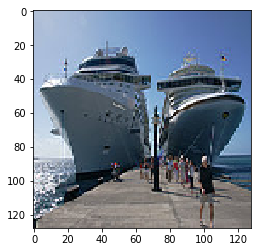

In [38]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(1):
    x = ("{}".format(classes[top_3[i]]))
plt.imshow(img)

In [164]:
prediction = []
for i in range(0,Xt.shape[0]):
    print("-----------------------------------------"+str(i)+"th image prediction completed-----------------------------------------")
    img = Xt[i]
    classes = np.array(train.columns[2:])
    proba = model.predict(img.reshape(1,128,128,3))
    top_3 = np.argsort(proba[0])[:-4:-1]
    for i in range(1):
        x = ("{}".format(classes[top_3[i]]))
        
    prediction.append(x)

    

-----------------------------------------0th image prediction completed-----------------------------------------
-----------------------------------------1th image prediction completed-----------------------------------------
-----------------------------------------2th image prediction completed-----------------------------------------
-----------------------------------------3th image prediction completed-----------------------------------------
-----------------------------------------4th image prediction completed-----------------------------------------
-----------------------------------------5th image prediction completed-----------------------------------------
-----------------------------------------6th image prediction completed-----------------------------------------
-----------------------------------------7th image prediction completed-----------------------------------------
-----------------------------------------8th image prediction completed-------------------------

-----------------------------------------71th image prediction completed-----------------------------------------
-----------------------------------------72th image prediction completed-----------------------------------------
-----------------------------------------73th image prediction completed-----------------------------------------
-----------------------------------------74th image prediction completed-----------------------------------------
-----------------------------------------75th image prediction completed-----------------------------------------
-----------------------------------------76th image prediction completed-----------------------------------------
-----------------------------------------77th image prediction completed-----------------------------------------
-----------------------------------------78th image prediction completed-----------------------------------------
-----------------------------------------79th image prediction completed----------------

-----------------------------------------142th image prediction completed-----------------------------------------
-----------------------------------------143th image prediction completed-----------------------------------------
-----------------------------------------144th image prediction completed-----------------------------------------
-----------------------------------------145th image prediction completed-----------------------------------------
-----------------------------------------146th image prediction completed-----------------------------------------
-----------------------------------------147th image prediction completed-----------------------------------------
-----------------------------------------148th image prediction completed-----------------------------------------
-----------------------------------------149th image prediction completed-----------------------------------------
-----------------------------------------150th image prediction completed-------

-----------------------------------------213th image prediction completed-----------------------------------------
-----------------------------------------214th image prediction completed-----------------------------------------
-----------------------------------------215th image prediction completed-----------------------------------------
-----------------------------------------216th image prediction completed-----------------------------------------
-----------------------------------------217th image prediction completed-----------------------------------------
-----------------------------------------218th image prediction completed-----------------------------------------
-----------------------------------------219th image prediction completed-----------------------------------------
-----------------------------------------220th image prediction completed-----------------------------------------
-----------------------------------------221th image prediction completed-------

-----------------------------------------284th image prediction completed-----------------------------------------
-----------------------------------------285th image prediction completed-----------------------------------------
-----------------------------------------286th image prediction completed-----------------------------------------
-----------------------------------------287th image prediction completed-----------------------------------------
-----------------------------------------288th image prediction completed-----------------------------------------
-----------------------------------------289th image prediction completed-----------------------------------------
-----------------------------------------290th image prediction completed-----------------------------------------
-----------------------------------------291th image prediction completed-----------------------------------------
-----------------------------------------292th image prediction completed-------

-----------------------------------------355th image prediction completed-----------------------------------------
-----------------------------------------356th image prediction completed-----------------------------------------
-----------------------------------------357th image prediction completed-----------------------------------------
-----------------------------------------358th image prediction completed-----------------------------------------
-----------------------------------------359th image prediction completed-----------------------------------------
-----------------------------------------360th image prediction completed-----------------------------------------
-----------------------------------------361th image prediction completed-----------------------------------------
-----------------------------------------362th image prediction completed-----------------------------------------
-----------------------------------------363th image prediction completed-------

-----------------------------------------426th image prediction completed-----------------------------------------
-----------------------------------------427th image prediction completed-----------------------------------------
-----------------------------------------428th image prediction completed-----------------------------------------
-----------------------------------------429th image prediction completed-----------------------------------------
-----------------------------------------430th image prediction completed-----------------------------------------
-----------------------------------------431th image prediction completed-----------------------------------------
-----------------------------------------432th image prediction completed-----------------------------------------
-----------------------------------------433th image prediction completed-----------------------------------------
-----------------------------------------434th image prediction completed-------

-----------------------------------------497th image prediction completed-----------------------------------------
-----------------------------------------498th image prediction completed-----------------------------------------
-----------------------------------------499th image prediction completed-----------------------------------------
-----------------------------------------500th image prediction completed-----------------------------------------
-----------------------------------------501th image prediction completed-----------------------------------------
-----------------------------------------502th image prediction completed-----------------------------------------
-----------------------------------------503th image prediction completed-----------------------------------------
-----------------------------------------504th image prediction completed-----------------------------------------
-----------------------------------------505th image prediction completed-------

-----------------------------------------568th image prediction completed-----------------------------------------
-----------------------------------------569th image prediction completed-----------------------------------------
-----------------------------------------570th image prediction completed-----------------------------------------
-----------------------------------------571th image prediction completed-----------------------------------------
-----------------------------------------572th image prediction completed-----------------------------------------
-----------------------------------------573th image prediction completed-----------------------------------------
-----------------------------------------574th image prediction completed-----------------------------------------
-----------------------------------------575th image prediction completed-----------------------------------------
-----------------------------------------576th image prediction completed-------

-----------------------------------------639th image prediction completed-----------------------------------------
-----------------------------------------640th image prediction completed-----------------------------------------
-----------------------------------------641th image prediction completed-----------------------------------------
-----------------------------------------642th image prediction completed-----------------------------------------
-----------------------------------------643th image prediction completed-----------------------------------------
-----------------------------------------644th image prediction completed-----------------------------------------
-----------------------------------------645th image prediction completed-----------------------------------------
-----------------------------------------646th image prediction completed-----------------------------------------
-----------------------------------------647th image prediction completed-------

-----------------------------------------710th image prediction completed-----------------------------------------
-----------------------------------------711th image prediction completed-----------------------------------------
-----------------------------------------712th image prediction completed-----------------------------------------
-----------------------------------------713th image prediction completed-----------------------------------------
-----------------------------------------714th image prediction completed-----------------------------------------
-----------------------------------------715th image prediction completed-----------------------------------------
-----------------------------------------716th image prediction completed-----------------------------------------
-----------------------------------------717th image prediction completed-----------------------------------------
-----------------------------------------718th image prediction completed-------

-----------------------------------------781th image prediction completed-----------------------------------------
-----------------------------------------782th image prediction completed-----------------------------------------
-----------------------------------------783th image prediction completed-----------------------------------------
-----------------------------------------784th image prediction completed-----------------------------------------
-----------------------------------------785th image prediction completed-----------------------------------------
-----------------------------------------786th image prediction completed-----------------------------------------
-----------------------------------------787th image prediction completed-----------------------------------------
-----------------------------------------788th image prediction completed-----------------------------------------
-----------------------------------------789th image prediction completed-------

-----------------------------------------852th image prediction completed-----------------------------------------
-----------------------------------------853th image prediction completed-----------------------------------------
-----------------------------------------854th image prediction completed-----------------------------------------
-----------------------------------------855th image prediction completed-----------------------------------------
-----------------------------------------856th image prediction completed-----------------------------------------
-----------------------------------------857th image prediction completed-----------------------------------------
-----------------------------------------858th image prediction completed-----------------------------------------
-----------------------------------------859th image prediction completed-----------------------------------------
-----------------------------------------860th image prediction completed-------

-----------------------------------------923th image prediction completed-----------------------------------------
-----------------------------------------924th image prediction completed-----------------------------------------
-----------------------------------------925th image prediction completed-----------------------------------------
-----------------------------------------926th image prediction completed-----------------------------------------
-----------------------------------------927th image prediction completed-----------------------------------------
-----------------------------------------928th image prediction completed-----------------------------------------
-----------------------------------------929th image prediction completed-----------------------------------------
-----------------------------------------930th image prediction completed-----------------------------------------
-----------------------------------------931th image prediction completed-------

-----------------------------------------994th image prediction completed-----------------------------------------
-----------------------------------------995th image prediction completed-----------------------------------------
-----------------------------------------996th image prediction completed-----------------------------------------
-----------------------------------------997th image prediction completed-----------------------------------------
-----------------------------------------998th image prediction completed-----------------------------------------
-----------------------------------------999th image prediction completed-----------------------------------------
-----------------------------------------1000th image prediction completed-----------------------------------------
-----------------------------------------1001th image prediction completed-----------------------------------------
-----------------------------------------1002th image prediction completed----

-----------------------------------------1064th image prediction completed-----------------------------------------
-----------------------------------------1065th image prediction completed-----------------------------------------
-----------------------------------------1066th image prediction completed-----------------------------------------
-----------------------------------------1067th image prediction completed-----------------------------------------
-----------------------------------------1068th image prediction completed-----------------------------------------
-----------------------------------------1069th image prediction completed-----------------------------------------
-----------------------------------------1070th image prediction completed-----------------------------------------
-----------------------------------------1071th image prediction completed-----------------------------------------
-----------------------------------------1072th image prediction complet

-----------------------------------------1134th image prediction completed-----------------------------------------
-----------------------------------------1135th image prediction completed-----------------------------------------
-----------------------------------------1136th image prediction completed-----------------------------------------
-----------------------------------------1137th image prediction completed-----------------------------------------
-----------------------------------------1138th image prediction completed-----------------------------------------
-----------------------------------------1139th image prediction completed-----------------------------------------
-----------------------------------------1140th image prediction completed-----------------------------------------
-----------------------------------------1141th image prediction completed-----------------------------------------
-----------------------------------------1142th image prediction complet

-----------------------------------------1204th image prediction completed-----------------------------------------
-----------------------------------------1205th image prediction completed-----------------------------------------
-----------------------------------------1206th image prediction completed-----------------------------------------
-----------------------------------------1207th image prediction completed-----------------------------------------
-----------------------------------------1208th image prediction completed-----------------------------------------
-----------------------------------------1209th image prediction completed-----------------------------------------
-----------------------------------------1210th image prediction completed-----------------------------------------
-----------------------------------------1211th image prediction completed-----------------------------------------
-----------------------------------------1212th image prediction complet

-----------------------------------------1274th image prediction completed-----------------------------------------
-----------------------------------------1275th image prediction completed-----------------------------------------
-----------------------------------------1276th image prediction completed-----------------------------------------
-----------------------------------------1277th image prediction completed-----------------------------------------
-----------------------------------------1278th image prediction completed-----------------------------------------
-----------------------------------------1279th image prediction completed-----------------------------------------
-----------------------------------------1280th image prediction completed-----------------------------------------
-----------------------------------------1281th image prediction completed-----------------------------------------
-----------------------------------------1282th image prediction complet

-----------------------------------------1344th image prediction completed-----------------------------------------
-----------------------------------------1345th image prediction completed-----------------------------------------
-----------------------------------------1346th image prediction completed-----------------------------------------
-----------------------------------------1347th image prediction completed-----------------------------------------
-----------------------------------------1348th image prediction completed-----------------------------------------
-----------------------------------------1349th image prediction completed-----------------------------------------
-----------------------------------------1350th image prediction completed-----------------------------------------
-----------------------------------------1351th image prediction completed-----------------------------------------
-----------------------------------------1352th image prediction complet

-----------------------------------------1414th image prediction completed-----------------------------------------
-----------------------------------------1415th image prediction completed-----------------------------------------
-----------------------------------------1416th image prediction completed-----------------------------------------
-----------------------------------------1417th image prediction completed-----------------------------------------
-----------------------------------------1418th image prediction completed-----------------------------------------
-----------------------------------------1419th image prediction completed-----------------------------------------
-----------------------------------------1420th image prediction completed-----------------------------------------
-----------------------------------------1421th image prediction completed-----------------------------------------
-----------------------------------------1422th image prediction complet

-----------------------------------------1484th image prediction completed-----------------------------------------
-----------------------------------------1485th image prediction completed-----------------------------------------
-----------------------------------------1486th image prediction completed-----------------------------------------
-----------------------------------------1487th image prediction completed-----------------------------------------
-----------------------------------------1488th image prediction completed-----------------------------------------
-----------------------------------------1489th image prediction completed-----------------------------------------
-----------------------------------------1490th image prediction completed-----------------------------------------
-----------------------------------------1491th image prediction completed-----------------------------------------
-----------------------------------------1492th image prediction complet

-----------------------------------------1554th image prediction completed-----------------------------------------
-----------------------------------------1555th image prediction completed-----------------------------------------
-----------------------------------------1556th image prediction completed-----------------------------------------
-----------------------------------------1557th image prediction completed-----------------------------------------
-----------------------------------------1558th image prediction completed-----------------------------------------
-----------------------------------------1559th image prediction completed-----------------------------------------
-----------------------------------------1560th image prediction completed-----------------------------------------
-----------------------------------------1561th image prediction completed-----------------------------------------
-----------------------------------------1562th image prediction complet

-----------------------------------------1624th image prediction completed-----------------------------------------
-----------------------------------------1625th image prediction completed-----------------------------------------
-----------------------------------------1626th image prediction completed-----------------------------------------
-----------------------------------------1627th image prediction completed-----------------------------------------
-----------------------------------------1628th image prediction completed-----------------------------------------
-----------------------------------------1629th image prediction completed-----------------------------------------
-----------------------------------------1630th image prediction completed-----------------------------------------
-----------------------------------------1631th image prediction completed-----------------------------------------
-----------------------------------------1632th image prediction complet

-----------------------------------------1694th image prediction completed-----------------------------------------
-----------------------------------------1695th image prediction completed-----------------------------------------
-----------------------------------------1696th image prediction completed-----------------------------------------
-----------------------------------------1697th image prediction completed-----------------------------------------
-----------------------------------------1698th image prediction completed-----------------------------------------
-----------------------------------------1699th image prediction completed-----------------------------------------
-----------------------------------------1700th image prediction completed-----------------------------------------
-----------------------------------------1701th image prediction completed-----------------------------------------
-----------------------------------------1702th image prediction complet

-----------------------------------------1764th image prediction completed-----------------------------------------
-----------------------------------------1765th image prediction completed-----------------------------------------
-----------------------------------------1766th image prediction completed-----------------------------------------
-----------------------------------------1767th image prediction completed-----------------------------------------
-----------------------------------------1768th image prediction completed-----------------------------------------
-----------------------------------------1769th image prediction completed-----------------------------------------
-----------------------------------------1770th image prediction completed-----------------------------------------
-----------------------------------------1771th image prediction completed-----------------------------------------
-----------------------------------------1772th image prediction complet

-----------------------------------------1834th image prediction completed-----------------------------------------
-----------------------------------------1835th image prediction completed-----------------------------------------
-----------------------------------------1836th image prediction completed-----------------------------------------
-----------------------------------------1837th image prediction completed-----------------------------------------
-----------------------------------------1838th image prediction completed-----------------------------------------
-----------------------------------------1839th image prediction completed-----------------------------------------
-----------------------------------------1840th image prediction completed-----------------------------------------
-----------------------------------------1841th image prediction completed-----------------------------------------
-----------------------------------------1842th image prediction complet

-----------------------------------------1904th image prediction completed-----------------------------------------
-----------------------------------------1905th image prediction completed-----------------------------------------
-----------------------------------------1906th image prediction completed-----------------------------------------
-----------------------------------------1907th image prediction completed-----------------------------------------
-----------------------------------------1908th image prediction completed-----------------------------------------
-----------------------------------------1909th image prediction completed-----------------------------------------
-----------------------------------------1910th image prediction completed-----------------------------------------
-----------------------------------------1911th image prediction completed-----------------------------------------
-----------------------------------------1912th image prediction complet

-----------------------------------------1974th image prediction completed-----------------------------------------
-----------------------------------------1975th image prediction completed-----------------------------------------
-----------------------------------------1976th image prediction completed-----------------------------------------
-----------------------------------------1977th image prediction completed-----------------------------------------
-----------------------------------------1978th image prediction completed-----------------------------------------
-----------------------------------------1979th image prediction completed-----------------------------------------
-----------------------------------------1980th image prediction completed-----------------------------------------
-----------------------------------------1981th image prediction completed-----------------------------------------
-----------------------------------------1982th image prediction complet

-----------------------------------------2044th image prediction completed-----------------------------------------
-----------------------------------------2045th image prediction completed-----------------------------------------
-----------------------------------------2046th image prediction completed-----------------------------------------
-----------------------------------------2047th image prediction completed-----------------------------------------
-----------------------------------------2048th image prediction completed-----------------------------------------
-----------------------------------------2049th image prediction completed-----------------------------------------
-----------------------------------------2050th image prediction completed-----------------------------------------
-----------------------------------------2051th image prediction completed-----------------------------------------
-----------------------------------------2052th image prediction complet

-----------------------------------------2114th image prediction completed-----------------------------------------
-----------------------------------------2115th image prediction completed-----------------------------------------
-----------------------------------------2116th image prediction completed-----------------------------------------
-----------------------------------------2117th image prediction completed-----------------------------------------
-----------------------------------------2118th image prediction completed-----------------------------------------
-----------------------------------------2119th image prediction completed-----------------------------------------
-----------------------------------------2120th image prediction completed-----------------------------------------
-----------------------------------------2121th image prediction completed-----------------------------------------
-----------------------------------------2122th image prediction complet

-----------------------------------------2184th image prediction completed-----------------------------------------
-----------------------------------------2185th image prediction completed-----------------------------------------
-----------------------------------------2186th image prediction completed-----------------------------------------
-----------------------------------------2187th image prediction completed-----------------------------------------
-----------------------------------------2188th image prediction completed-----------------------------------------
-----------------------------------------2189th image prediction completed-----------------------------------------
-----------------------------------------2190th image prediction completed-----------------------------------------
-----------------------------------------2191th image prediction completed-----------------------------------------
-----------------------------------------2192th image prediction complet

-----------------------------------------2254th image prediction completed-----------------------------------------
-----------------------------------------2255th image prediction completed-----------------------------------------
-----------------------------------------2256th image prediction completed-----------------------------------------
-----------------------------------------2257th image prediction completed-----------------------------------------
-----------------------------------------2258th image prediction completed-----------------------------------------
-----------------------------------------2259th image prediction completed-----------------------------------------
-----------------------------------------2260th image prediction completed-----------------------------------------
-----------------------------------------2261th image prediction completed-----------------------------------------
-----------------------------------------2262th image prediction complet

-----------------------------------------2324th image prediction completed-----------------------------------------
-----------------------------------------2325th image prediction completed-----------------------------------------
-----------------------------------------2326th image prediction completed-----------------------------------------
-----------------------------------------2327th image prediction completed-----------------------------------------
-----------------------------------------2328th image prediction completed-----------------------------------------
-----------------------------------------2329th image prediction completed-----------------------------------------
-----------------------------------------2330th image prediction completed-----------------------------------------
-----------------------------------------2331th image prediction completed-----------------------------------------
-----------------------------------------2332th image prediction complet

-----------------------------------------2394th image prediction completed-----------------------------------------
-----------------------------------------2395th image prediction completed-----------------------------------------
-----------------------------------------2396th image prediction completed-----------------------------------------
-----------------------------------------2397th image prediction completed-----------------------------------------
-----------------------------------------2398th image prediction completed-----------------------------------------
-----------------------------------------2399th image prediction completed-----------------------------------------
-----------------------------------------2400th image prediction completed-----------------------------------------
-----------------------------------------2401th image prediction completed-----------------------------------------
-----------------------------------------2402th image prediction complet

-----------------------------------------2464th image prediction completed-----------------------------------------
-----------------------------------------2465th image prediction completed-----------------------------------------
-----------------------------------------2466th image prediction completed-----------------------------------------
-----------------------------------------2467th image prediction completed-----------------------------------------
-----------------------------------------2468th image prediction completed-----------------------------------------
-----------------------------------------2469th image prediction completed-----------------------------------------
-----------------------------------------2470th image prediction completed-----------------------------------------
-----------------------------------------2471th image prediction completed-----------------------------------------
-----------------------------------------2472th image prediction complet

-----------------------------------------2534th image prediction completed-----------------------------------------
-----------------------------------------2535th image prediction completed-----------------------------------------
-----------------------------------------2536th image prediction completed-----------------------------------------
-----------------------------------------2537th image prediction completed-----------------------------------------
-----------------------------------------2538th image prediction completed-----------------------------------------
-----------------------------------------2539th image prediction completed-----------------------------------------
-----------------------------------------2540th image prediction completed-----------------------------------------
-----------------------------------------2541th image prediction completed-----------------------------------------
-----------------------------------------2542th image prediction complet

-----------------------------------------2604th image prediction completed-----------------------------------------
-----------------------------------------2605th image prediction completed-----------------------------------------
-----------------------------------------2606th image prediction completed-----------------------------------------
-----------------------------------------2607th image prediction completed-----------------------------------------
-----------------------------------------2608th image prediction completed-----------------------------------------
-----------------------------------------2609th image prediction completed-----------------------------------------
-----------------------------------------2610th image prediction completed-----------------------------------------
-----------------------------------------2611th image prediction completed-----------------------------------------
-----------------------------------------2612th image prediction complet

-----------------------------------------2674th image prediction completed-----------------------------------------
-----------------------------------------2675th image prediction completed-----------------------------------------
-----------------------------------------2676th image prediction completed-----------------------------------------
-----------------------------------------2677th image prediction completed-----------------------------------------
-----------------------------------------2678th image prediction completed-----------------------------------------
-----------------------------------------2679th image prediction completed-----------------------------------------


In [165]:
sample['Category']=prediction

In [171]:
sample.head()

,image,category
0,1007700.jpg,4
1,1011369.jpg,1
2,1051155.jpg,4
3,1062001.jpg,2
4,1069397.jpg,3


In [167]:
sample['Category'].unique()

array(['Cruise', 'Cargo', 'Military', 'Carrier', 'Tankers'], dtype=object)

In [168]:
dicto = {'Cargo': 1, 
'Military': 2, 
'Carrier': 3, 
'Cruise': 4, 
'Tankers': 5}
sample.Category = [dicto[item] for item in sample.Category] 


In [170]:
sample['category']=sample['Category']
sample=sample.drop('Category',axis=1)

In [172]:
sample.to_csv("Sample.csv",index=False)